## USD AAI 510 - Machine Learning
Assignment 1
Bryan Carr, 16 May 2022

In this assignment, we will do some light exploratory data analysis on our dataset.

The dataset is one for home loan applications. It is from a previous kaggle competition:
https://www.kaggle.com/competitions/home-credit-default-risk/data

Thinking about the problem: if I were a lendor, what kinds of things would I consider in approving/denying a loan applicant?

Income Amount
Income reliability -- type of employment, etc
Loan Amount (especially compared to income)
Value of asset backing the loan
Applicant's cash holdings
Value of applicant's other assets
Outstanding debt of the applicant

The main data file is Application_train.csv, with 307,511 rows. Each row represents an application for a loan and has 122 features (up to column DR == 4*26 + 18 == 122).

The SK_ID_CURR feature is a label for the current loan application and can be ignored.
The TARGET feature is our target variable (True/False for 'Does the applicant have a history of missed payments?') and can be ignored, as it would be the target for our model to predict.

Many columns represent the normalized details of the properties. Many of these values are empty, and the normalization makes it difficult to rationalize. I will not be using these, and instead look to other indicators (e.g. the price of the property/loan as an aggregate indicator).

Many columns are 'Document Flags' which means weather a document is included in their application or not. Without further detail it is hard to gauge the importance of these documents, therefore I will not be using them.

I will begin by importing some standard libraries, then read in the data

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
application_df = pd.read_csv('data/application_train.csv')

In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
application_df.shape

(307511, 122)

In [6]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Picking the Data

I will build a new data frame with the label and target features, along with my top 10 choices to plot.

My choices for variables are:

Amt_Income_Total == represents the applicant's total income

Amt_Credit == The value of the Loan, representing the total debt.

Amt_Annuity == The Monthly Payment against the Loan, contributing to both Principal and Interest (this was learned with some help from Google). This payment compared to income may indicate how easy it is for the applicant to repay.

Amt_Goods_Price == The value of the goods (home) the loan is taken out for. This helps validate the value of the loan. The difference between Amt_Credit and Goods_Price would indicate a down payment, which is typically a positive sign.

Name_Income_Type == The type of employment of the applicant. This can help determine reliability - state employees are likely to have reliable jobs over time. Seasonal workers might not.
Occupation_Type == Amplifying info on the type of occupation. This may help indicate reliability of the stream of income.

Name_Family_Status == The applicant's family status. Partnerships may indicate additional income streams. Separations may represent additional financial obligations.

Cnt_Fam_Members == Number of family members. Higher means more mouths to feed and therefore more external expenses. Any indicates additional obligation, and a push to be a reliable provider.

Days_Birth == Age of the applicant

Days_Employed == Time spent at current employment. Higher may indicate more reliable.

Region_Rating_Client_W_City == An internal rating for the Region & City the applicant resides in. Not totally clear, but means something to Home Credit and therefore should be valuable.

Ext_Source == External scores for the applicants, normalized. These could be credit scores, which would make them valuable info to have on hand.


In [8]:
key_variables = ['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',  'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [9]:
key_vars_df = application_df.loc[:,key_variables]

In [10]:
key_vars_df

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,202500.0,406597.5,24700.5,351000.0,Working,Laborers,Single / not married,1.0,-9461,-637,2,0.083037,0.262949,0.139376
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Core staff,Married,2.0,-16765,-1188,1,0.311267,0.622246,NaN
2,100004,0,67500.0,135000.0,6750.0,135000.0,Working,Laborers,Single / not married,1.0,-19046,-225,2,NaN,0.555912,0.729567
3,100006,0,135000.0,312682.5,29686.5,297000.0,Working,Laborers,Civil marriage,2.0,-19005,-3039,2,NaN,0.650442,NaN
4,100007,0,121500.0,513000.0,21865.5,513000.0,Working,Core staff,Single / not married,1.0,-19932,-3038,2,NaN,0.322738,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,Working,Sales staff,Separated,1.0,-9327,-236,1,0.145570,0.681632,NaN
307507,456252,0,72000.0,269550.0,12001.5,225000.0,Pensioner,NaN,Widow,1.0,-20775,365243,2,NaN,0.115992,NaN
307508,456253,0,153000.0,677664.0,29979.0,585000.0,Working,Managers,Separated,1.0,-14966,-7921,3,0.744026,0.535722,0.218859
307509,456254,1,171000.0,370107.0,20205.0,319500.0,Commercial associate,Laborers,Married,2.0,-11961,-4786,2,NaN,0.514163,0.661024


In [11]:
key_vars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   AMT_INCOME_TOTAL             307511 non-null  float64
 3   AMT_CREDIT                   307511 non-null  float64
 4   AMT_ANNUITY                  307499 non-null  float64
 5   AMT_GOODS_PRICE              307233 non-null  float64
 6   NAME_INCOME_TYPE             307511 non-null  object 
 7   OCCUPATION_TYPE              211120 non-null  object 
 8   NAME_FAMILY_STATUS           307511 non-null  object 
 9   CNT_FAM_MEMBERS              307509 non-null  float64
 10  DAYS_BIRTH                   307511 non-null  int64  
 11  DAYS_EMPLOYED                307511 non-null  int64  
 12  REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 13 

In [12]:
key_vars_df.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307509.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000
mean,278180.518577,0.080729,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,2.152665,-16036.995067,63815.045904,2.031521,0.502130,5.143927e-01,0.510853
std,102790.175348,0.272419,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.910682,4363.988632,141275.766519,0.502737,0.211062,1.910602e-01,0.194844
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,1.000000,-25229.000000,-17912.000000,1.000000,0.014568,8.173617e-08,0.000527
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,2.000000,-19682.000000,-2760.000000,2.000000,0.334007,3.924574e-01,0.370650
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,2.000000,-15750.000000,-1213.000000,2.000000,0.505998,5.659614e-01,0.535276
75%,367142.500000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,3.000000,-12413.000000,-289.000000,2.000000,0.675053,6.636171e-01,0.669057
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,20.000000,-7489.000000,365243.000000,3.000000,0.962693,8.549997e-01,0.896010


In [13]:
## I will also make lists of Numeric and Categorical variables, for future plotting

key_vars_numeric = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',  'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED',  'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

key_vars_categorical = ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS']

## Plotting the Variables

Now we will move on to plotting the variables.

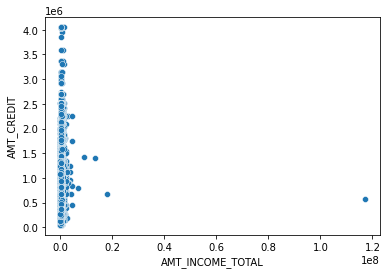

In [14]:
plot_income = sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',
                              data=key_vars_df)
plt.show()

We have one outlier which is ruining our scale. Let's drop it and see how that impacts things

In [15]:
key_vars_df_trim = key_vars_df.drop(key_vars_df['AMT_INCOME_TOTAL'].idxmax())

In [16]:
key_vars_df.loc[key_vars_df['AMT_INCOME_TOTAL'].idxmax(),:]

SK_ID_CURR                       114967
TARGET                                1
AMT_INCOME_TOTAL               1.17e+08
AMT_CREDIT                       562491
AMT_ANNUITY                     26194.5
AMT_GOODS_PRICE                  454500
NAME_INCOME_TYPE                Working
OCCUPATION_TYPE                Laborers
NAME_FAMILY_STATUS              Married
CNT_FAM_MEMBERS                       3
DAYS_BIRTH                       -12615
DAYS_EMPLOYED                      -922
REGION_RATING_CLIENT_W_CITY           2
EXT_SOURCE_1                   0.460809
EXT_SOURCE_2                   0.113161
EXT_SOURCE_3                   0.145543
Name: 12840, dtype: object

The entry has a disproportionately high income, especially for 34-year-old labourers. The other info does not appear surprising at a glance. However, the Target column indicates trouble repaying previous loans, and therefore their application should be rejected.

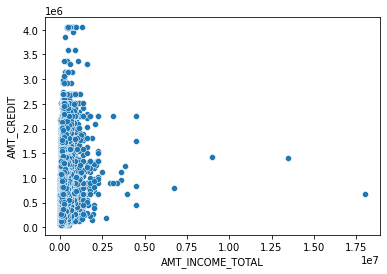

In [17]:
plot_income2 = sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT',
                              data=key_vars_df_trim)
plt.show()

In [18]:
## Create a PairGrid, without the SK ID label

numeric_pairs = sns.PairGrid(data=key_vars_df_trim.drop(['SK_ID_CURR'], axis=1), hue='TARGET')

numeric_pairs.map(sns.scatterplot)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000246E88B8670> (for post_execute):


KeyboardInterrupt: 

We can see that there are relationships between Amt_Credit and Amt_Annuity, with a pretty clear upper and lower limit for values, likely representing percentage of income available to spend on a loan.  There is also a tight correlation between Amount of Credit and Goods_Price. Neither of those revelations is surprising, or very interesting.

The External Scores do not show any obvious relationships, having a wide range across all incomes, loan sizes, etc. They might not be as helpful as I hoped.

For Family Size (Cnt_Fam_Members), we can see the larger families tend to require smaller loan sizes.

These scatters were not very indicative. I will try looking at Histograms.

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

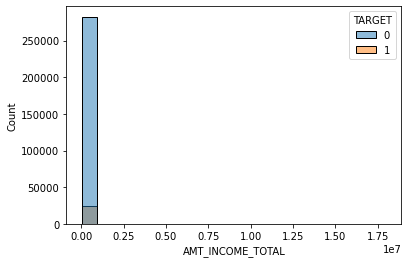

In [29]:
sns.histplot(data=key_vars_df_trim, x='AMT_INCOME_TOTAL', bins=20, hue='TARGET')

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

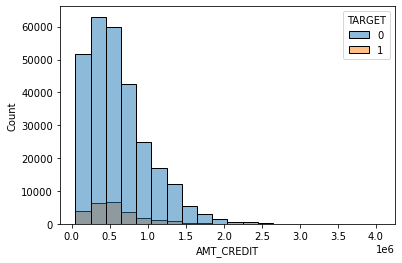

In [30]:
sns.histplot(data=key_vars_df_trim, x='AMT_CREDIT', bins=20, hue='TARGET')

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Count'>

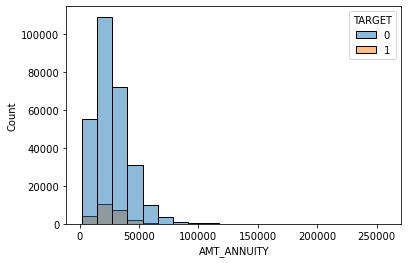

In [31]:
sns.histplot(data=key_vars_df_trim, x='AMT_ANNUITY', bins=20, hue='TARGET')

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Count'>

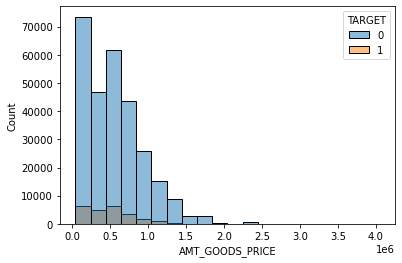

In [34]:
sns.histplot(data=key_vars_df_trim, x='AMT_GOODS_PRICE', bins=20, hue='TARGET')

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='Count'>

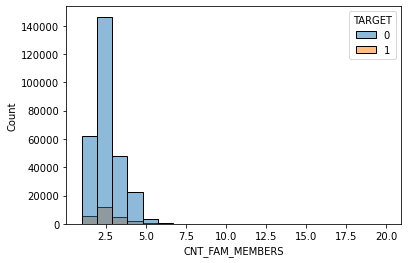

In [35]:
sns.histplot(data=key_vars_df_trim, x='CNT_FAM_MEMBERS', bins=20, hue='TARGET')

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

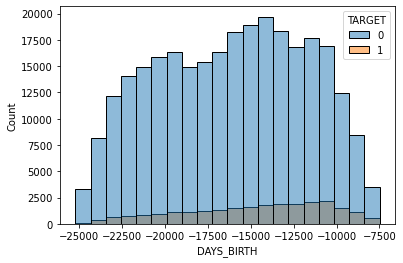

In [36]:
sns.histplot(data=key_vars_df_trim, x='DAYS_BIRTH', bins=20, hue='TARGET')

<AxesSubplot:xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='Count'>

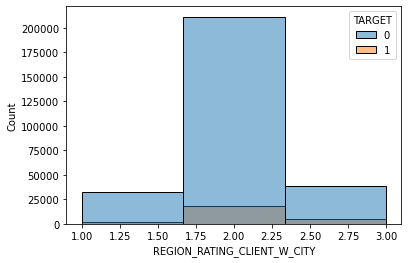

In [41]:
sns.histplot(data=key_vars_df_trim, x='REGION_RATING_CLIENT_W_CITY', bins=3, hue='TARGET')

<AxesSubplot:xlabel='EXT_SOURCE_1', ylabel='Count'>

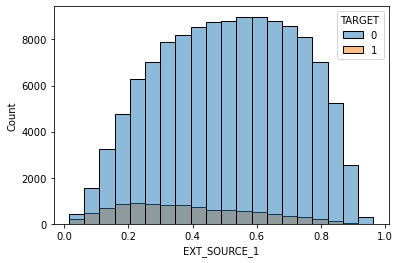

In [42]:
sns.histplot(data=key_vars_df_trim, x='EXT_SOURCE_1', bins=20, hue='TARGET')

<AxesSubplot:xlabel='EXT_SOURCE_2', ylabel='Count'>

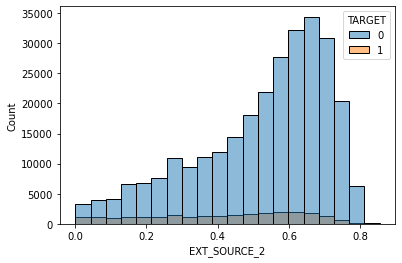

In [43]:
sns.histplot(data=key_vars_df_trim, x='EXT_SOURCE_2', bins=20, hue='TARGET')

<AxesSubplot:xlabel='EXT_SOURCE_3', ylabel='Count'>

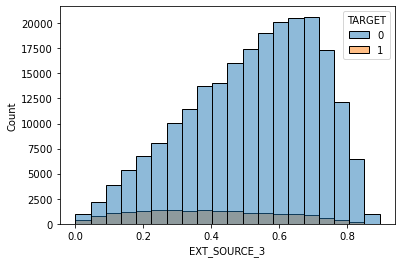

In [44]:
sns.histplot(data=key_vars_df_trim, x='EXT_SOURCE_3', bins=20, hue='TARGET')

The histograms reveal only a few relationships.

The DAYS_BORN histogram shows that there is increasing difficulty making payments as age increases, to a point, followed by a drop off. The dorp off may be attributable somewhat to deaths in old age, as there are also drop offs in succesful payment-makers.

The CLIENT_RATING graph shows that there are by far the most applicants coming from cities/regions with rating 2. It also shows that rating 3 has a higher level of difficulty making payments, as a fraction of the total.

The External Score #1 shows some clear difficulty for lower scorers to make their payments. Unfortunately the other two ratings are relatively flat.

## Categorical Plots


In [45]:
key_vars_categorical

['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS']

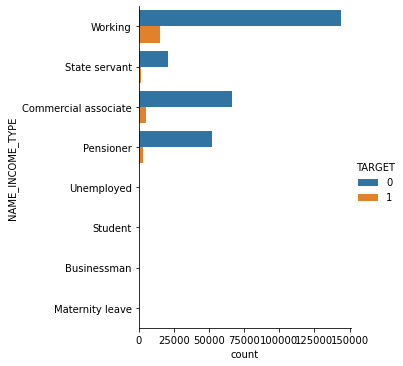

In [48]:
sns.catplot(data=key_vars_df_trim, kind='count', hue='TARGET', y='NAME_INCOME_TYPE')

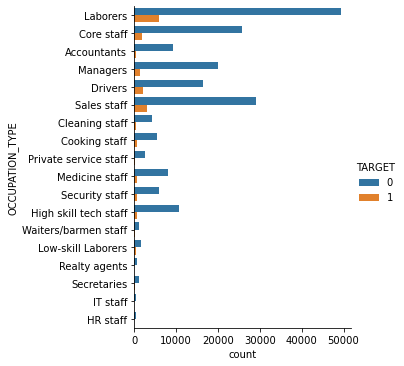

In [49]:
sns.catplot(data=key_vars_df_trim, kind='count', hue='TARGET', y='OCCUPATION_TYPE')

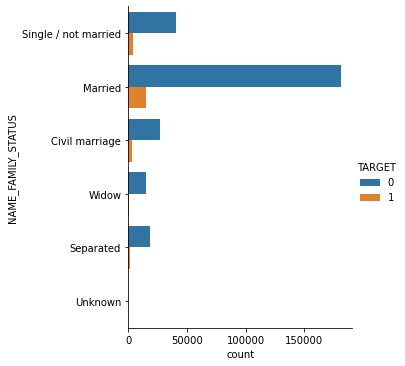

In [47]:
sns.catplot(data=key_vars_df_trim, kind='count', hue='TARGET', y='NAME_FAMILY_STATUS')